#### Sales Analysis

In [1]:
## Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

#### Merge sales data from different files into one

In [2]:
### Path to the directory containing sales files
sales_folder_path = "./sales_data"

### Get all the CSV files from the directory
sales_files = [file for file in os.listdir(sales_folder_path) if file.endswith(".csv")]

### Empty list to hold dataframes
sales_dataframes = []

### Read each CSV file and append it to the dataframes list
for file in sales_files:
    file_path = os.path.join(sales_folder_path, file)
    sales_data = pd.read_csv(file_path)
    sales_dataframes.append(sales_data)

### Concatenate all dataframes into one
all_sales_df = pd.concat(sales_dataframes, ignore_index=True)

### Save the combined dataframe to a new CSV file
all_sales_df.to_csv("all_sales_df.csv", index=False)

In [3]:
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


#### Question 1: Which month had the best sales? How much was earned that month?

In [4]:
## Step 1: Convert 'quantity ordered' and 'price each' columns to numeric (float for price, int for quantity)
# This will force non-numeric values to NaN
all_sales_df["Quantity Ordered"] = pd.to_numeric(all_sales_df["Quantity Ordered"], errors='coerce')
all_sales_df["Price Each"] = pd.to_numeric(all_sales_df["Price Each"], errors='coerce')

### Step 2: Create a new 'Sales Amount' column
all_sales_df["Sales Amount"] = all_sales_df["Quantity Ordered"] * all_sales_df["Price Each"]

# Step 3: Convert 'date' column to datetime format 
all_sales_df['Order Date'] = pd.to_datetime(all_sales_df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Step 2: Create separate columns for the Order Date and Order Time
all_sales_df['Date'] = all_sales_df['Order Date'].dt.date    # Extracts just the date (mm/dd/yyyy)
all_sales_df['Time'] = all_sales_df['Order Date'].dt.time    # Extracts just the time (HH:MM)

## Step 3: Convert the 'Order Date' column to datetime format
all_sales_df["Date"] = pd.to_datetime(all_sales_df["Date"])

### Step 4: Extract year and month from the 'Order Date' column
all_sales_df["Year_Month"] = all_sales_df["Date"].dt.to_period("M")

### Step 5: Group by 'Year_Month' and sum the 'Sales Amount'
monthly_sales = all_sales_df.groupby("Year_Month")["Sales Amount"].sum()

### Step 6: Identify the month with the highest sales
Highest_sales_month = monthly_sales.idxmax()
Highest_sales_amount = monthly_sales.max()

Lowest_sales_month = monthly_sales.idxmin()
Lowest_sales_amount = monthly_sales.min()

print(f"{Highest_sales_month} had the highest sales of all the months with ${Highest_sales_amount:.2f}.")

print(f" The worst month was {Lowest_sales_month} with ${Lowest_sales_amount:.2f} in sales.")


2019-12 had the highest sales of all the months with $4613443.34.
 The worst month was 2020-01 with $8670.29 in sales.


In [5]:
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Date,Time,Year_Month
0,278797,Wired Headphones,1.0,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11.99,2019-11-21,09:54:00,2019-11
1,278798,USB-C Charging Cable,2.0,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",23.90,2019-11-17,10:03:00,2019-11
2,278799,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",150.00,2019-11-19,14:56:00,2019-11
3,278800,27in FHD Monitor,1.0,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",149.99,2019-11-25,22:24:00,2019-11
4,278801,Bose SoundSport Headphones,1.0,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",99.99,2019-11-09,13:56:00,2019-11


#### Graph of Monthly Sales

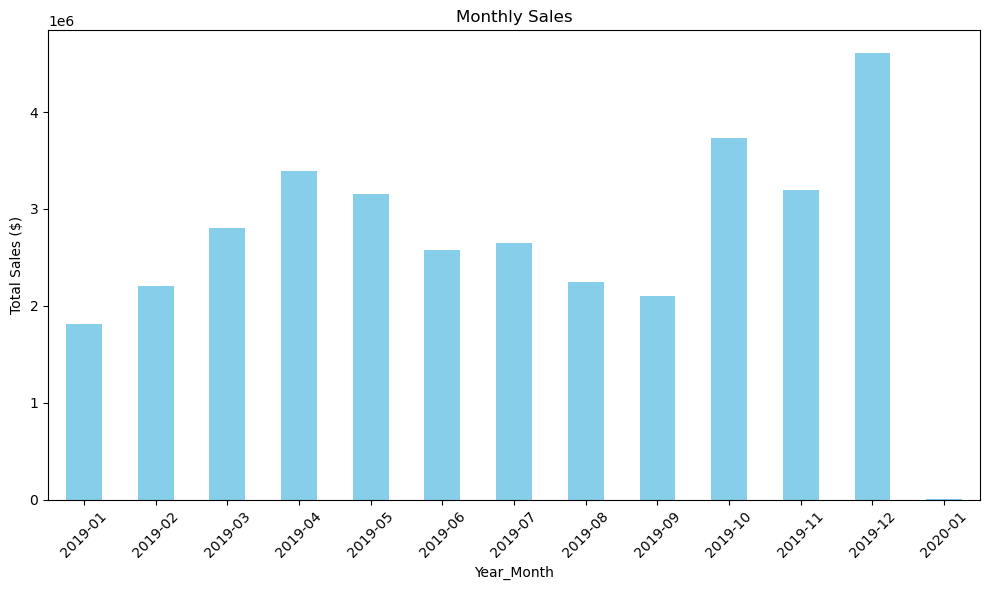

In [6]:
### Group by 'Year_Month' and sum the 'Sales Amount'
monthly_sales = all_sales_df.groupby("Year_Month")["Sales Amount"].sum()

### Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Year_Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Question 2: Which city had the highest sales?

In [7]:
### Step 1: Extract the city from the 'Purchase Address' column
def get_city(address):
    if isinstance(address, str):  # Check if the address is a string
        parts = address.split(",")
        if len(parts) > 1:  # Ensure there is a city part after the street address part
            city_part = parts[1].strip()  # Take the second part (city part).
            return city_part  # Return city without modification
        return None 

def get_state(address):
    if isinstance(address, str):  # Check if the address is a string
        parts = address.split(",")
        if len(parts) > 2:  # Ensure there is a state part after the street address and city parts
            state_part = parts[2].strip()  # Take the third part (state part)
            return state_part.split(" ")[0]  # Return only the state abbreviation
        return None  
#### Create 'City' column in the dataframe
all_sales_df["City"] = all_sales_df["Purchase Address"].apply(lambda x: f"{get_city(x)}, {get_state(x)}" if get_city(x) and get_state(x) else None)

### Step 2: Group by 'City' and sum 'Sales amount'
city_sales = all_sales_df.groupby('City')['Sales Amount'].sum()

### Step 3: Identify the city with the highest sales
highest_sales_city = city_sales.idxmax()  # Name of city with highest sales
highest_sales_amount = city_sales.max()    # Amount of sales in that city

lowest_sales_city = city_sales.idxmin()  # Name of city with lowest sales
lowest_sales_amount = city_sales.min()    # Amount of sales in that city

# Print the result
print(f"{highest_sales_city} had the highest amount of sales during the period (${highest_sales_amount:.2f})")
print(f"While {lowest_sales_city} had the least amount of sales during (${lowest_sales_amount:.2f})")

San Francisco, CA had the highest amount of sales during the period ($8262203.91)
While Portland, ME had the least amount of sales during ($449758.27)


#### Graph of Sales by City

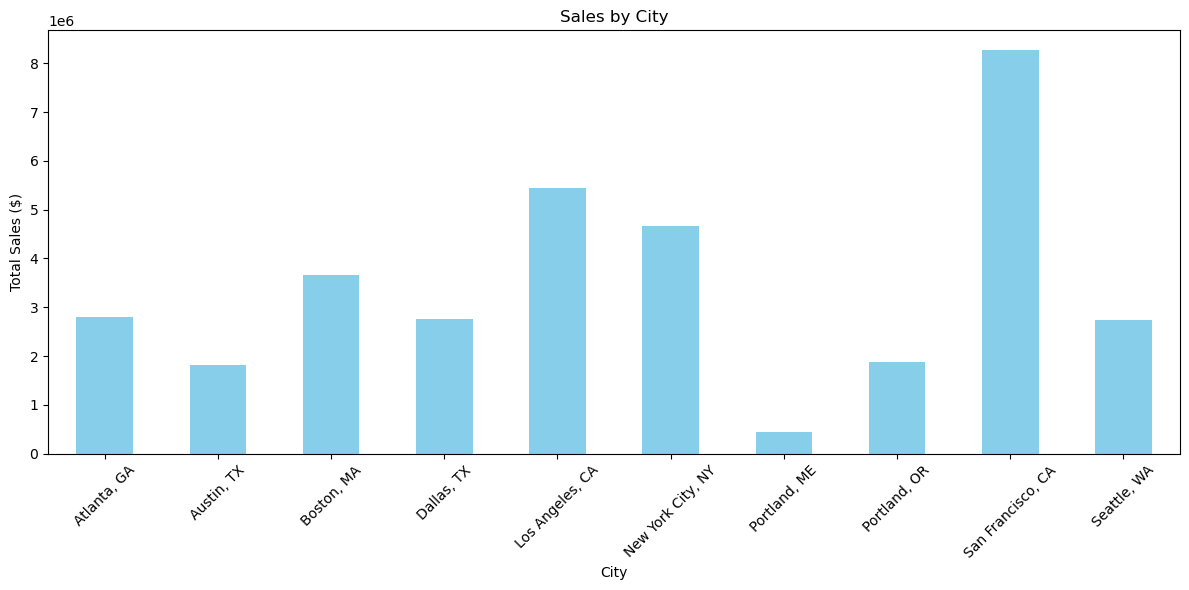

In [8]:
### Step 1: Group by 'City' and sum 'Sales amount'
city_sales = all_sales_df.groupby('City')['Sales Amount'].sum()

### Step 2: Plot the sales by city
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [9]:
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Date,Time,Year_Month,City
0,278797,Wired Headphones,1.0,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11.99,2019-11-21,09:54:00,2019-11,"New York City, NY"
1,278798,USB-C Charging Cable,2.0,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",23.90,2019-11-17,10:03:00,2019-11,"Austin, TX"
2,278799,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",150.00,2019-11-19,14:56:00,2019-11,"Los Angeles, CA"
3,278800,27in FHD Monitor,1.0,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",149.99,2019-11-25,22:24:00,2019-11,"Seattle, WA"
4,278801,Bose SoundSport Headphones,1.0,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",99.99,2019-11-09,13:56:00,2019-11,"Boston, MA"


#### Question 3: What time should we display advertisements to maximize the likelihood of customers buying a product?

/tmp/ipykernel_9386/3364810407.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_sales['Time'] = pd.to_datetime(time_sales['Time'].astype(str))


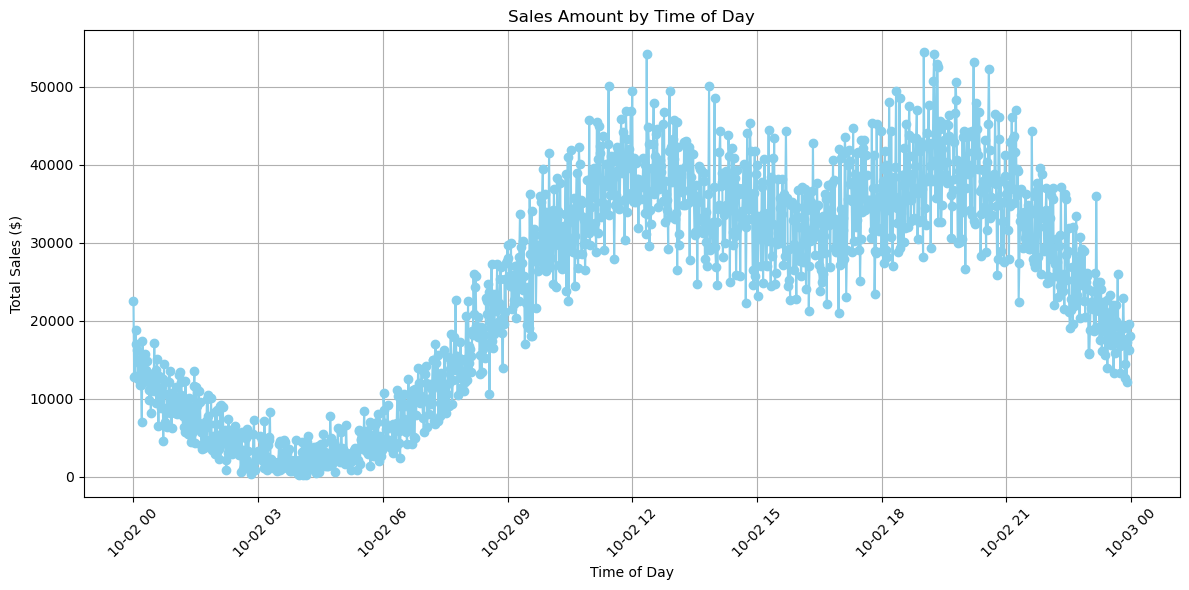

The optimal time to display advertisements is 19:01:00 with total sales of $54503.14.


In [10]:
### Step 1: Convert the Time column to a datetime object
all_sales_df['Time'] = pd.to_datetime(all_sales_df['Time'], format='%H:%M:%S')

### Step 2: Group by Time and sum Sales Amount
time_sales = all_sales_df.groupby(all_sales_df['Time'].dt.time)['Sales Amount'].sum().reset_index()

### Step 3: Convert the time back to datetime for plotting
time_sales['Time'] = pd.to_datetime(time_sales['Time'].astype(str))

### Step 4: Plot a graph of sales by time
plt.figure(figsize=(12, 6))
plt.plot(time_sales['Time'], time_sales['Sales Amount'], marker='o', color='skyblue')
plt.title('Sales Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.show()

### Determine the optimal advertisement time of the day
optimal_advertisement_time = time_sales.loc[time_sales['Sales Amount'].idxmax()]

### Format the optimal time for display
optimal_time_str = optimal_advertisement_time['Time'].time().strftime('%H:%M:%S')
print(f"The optimal time to display advertisements is {optimal_time_str} with total sales of ${optimal_advertisement_time['Sales Amount']:.2f}.")

#### Question 4: What products are most often sold together?

In [11]:
## One way to determine those products that are often sold together is to check the Order ID column.
## If two or more products have the same order ID, it means they were ordered together (and most likely delivered to
## the same address).


## Step 1: Filter the dataframe to remain with only products with duplicated order IDs.
duplicated_orderIDs_df = all_sales_df[all_sales_df["Order ID"].duplicated(keep=False)]

## Step 2: Create a new column in the new dataframe that groups products with similar order IDs.
duplicated_orderIDs_df["Grouped"] = duplicated_orderIDs_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

## Step 3: Drop duplicated groupings
duplicated_orderIDs_df = duplicated_orderIDs_df[["Order ID", "Grouped"]].drop_duplicates()

## Step 4: Drop rows with NaN values in the 'Grouped' column
duplicated_orderIDs_df_cleaned = duplicated_orderIDs_df.dropna(subset=["Grouped"])


duplicated_orderIDs_df_cleaned.head(20)

## Step 5: Count the number of products in each grouping
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicated_orderIDs_df_cleaned["Grouped"]:
    row_items_list = row.split(",")
    count.update(Counter(combinations(row_items_list, 2))) # Products that are commonly sold as 2 items together

for key, value in count.most_common(20):
    print(key, value)

('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51


/tmp/ipykernel_9386/2222785429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_orderIDs_df["Grouped"] = duplicated_orderIDs_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


#### Question 5: What product sold the most? Why do you think it sold the most?

In [20]:
### First group the data by the 'Product' column and sum the 'Quantity Ordered'. 
### This will give the total quantity of each product sold.

# Group by 'Product' and sum the 'Quantity Ordered', then sort the product sales in descending order
product_sales = all_sales_df.groupby('Product')['Quantity Ordered'].sum()

product_sales_sorted = product_sales.sort_values(ascending=False)

product_highest_sales = product_sales_sorted.idxmax()
highest_quantity_sold = product_sales_sorted.max()

print(f"The product that sold the most is: {product_highest_sales}")
print(f"Total quantity sold: {highest_quantity_sold}")

The product that sold the most is: AAA Batteries (4-pack)
Total quantity sold: 31017.0


#### Visualize Total Sales by Product

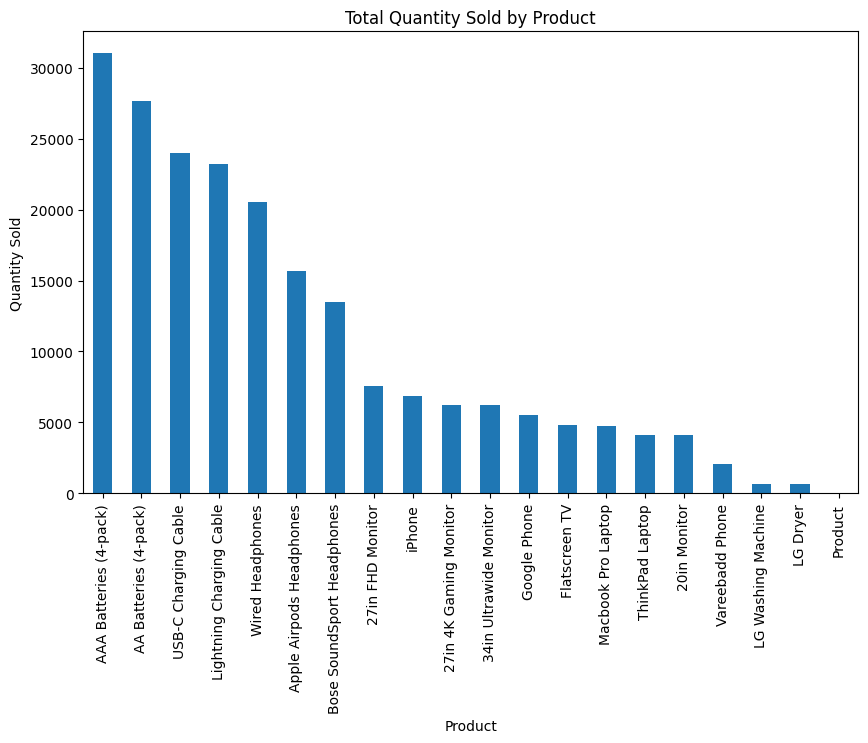

In [23]:
# Plot the total sales for each product
plt.figure(figsize=(10, 6))
product_sales_sorted.plot(kind='bar')
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#### To determine whether or not price had an impact on the quantities sold of the products, we would overlay a 
#### line graph of price on the above bar graph of quantity sold by product as follows:

/tmp/ipykernel_7720/840468253.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_sales_sorted.index, rotation=90)


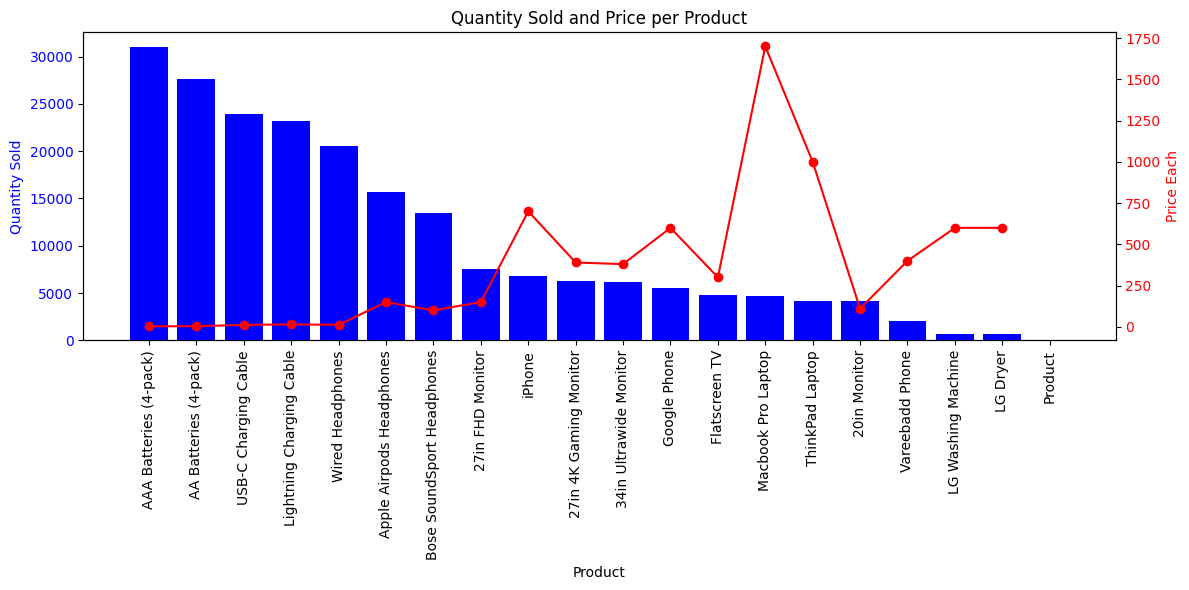

In [25]:
# Group by 'Product' and sum the 'Quantity Ordered'
product_sales = all_sales_df.groupby('Product')['Quantity Ordered'].sum()

# Get the average price of each product (the 'Price Each' column)
product_price = all_sales_df.groupby('Product')['Price Each'].mean()

# Sort the products by quantity sold for better visualization
product_sales_sorted = product_sales.sort_values(ascending=False)

# Sort the product prices to match the sorted quantities
product_price_sorted = product_price.loc[product_sales_sorted.index]

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar chart for quantity sold on the primary y-axis
ax1.bar(product_sales_sorted.index, product_sales_sorted, color='b', label='Quantity Sold')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(product_sales_sorted.index, rotation=90)

# Create a secondary y-axis for the price
ax2 = ax1.twinx()

# Plot the line graph for product price on the secondary y-axis
ax2.plot(product_sales_sorted.index, product_price_sorted, color='r', label='Price', marker='o')
ax2.set_ylabel('Price Each', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title to the graph
plt.title('Quantity Sold and Price per Product')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#### Conclusion: From the new graph, it is clear that products that sold the most were those with lower prices
#### compared to those that sold the least.
#### Therefore, one of the reasons why some products such as AAA Batteries (4-pack) and AA Batteries (2-pack) sold
#### the most could be price. These products were priced lower than the other products. 
#### This could be an indication of price sensitivity among customers.